In [ ]:
!gdown 1pE2puCp0KKkLPgDgvlQCEvAVUXauFPca

Downloading...
From: https://drive.google.com/uc?id=1pE2puCp0KKkLPgDgvlQCEvAVUXauFPca
To: /content/Copy of FruitinAmazon.zip
100% 1.24M/1.24M [00:00<00:00, 89.1MB/s]


In [ ]:
!unzip FruitinAmazon.zip

Archive:  FruitinAmazon.zip
replace FruitinAmazon/test/cupuacu/download (5).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
replace FruitinAmazon/test/acai/images (2).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazo

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

# Task 1: Data Understanding and Visualization

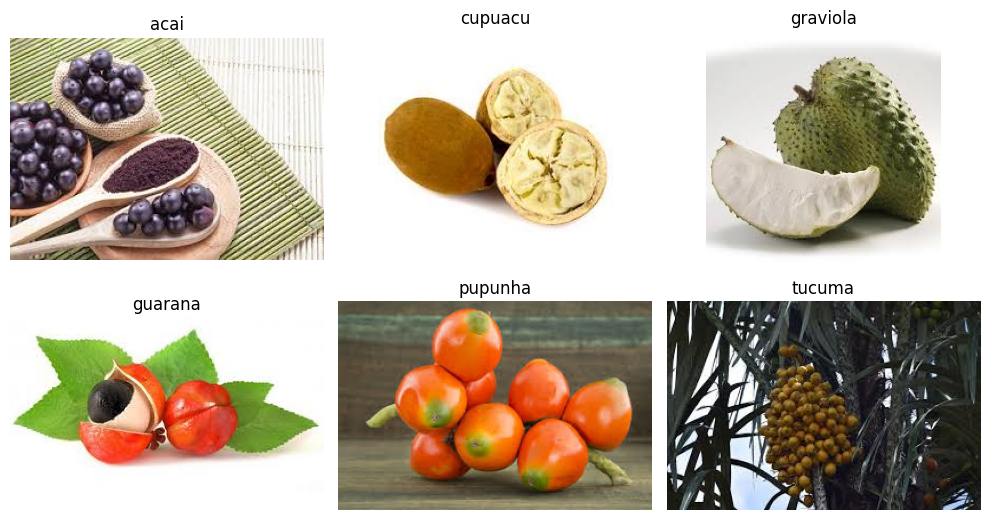

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [ ]:
train_dir = "/content/FruitinAmazon/train"
test_dir = "/content/FruitinAmazon/test"

class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)

plt.figure(figsize=(10,8))
for i, class_name in enumerate(class_names):
  class_dir = os.path.join(train_dir, class_name)
  images = os.listdir(class_dir)
  img_name = random.choice(images)
  img_path = os.path.join(class_dir, img_name)
  img = Image.open(img_path)

  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title(class_name)
  plt.axis('off')

plt.tight_layout()
plt.show()
print(class_names)

In [ ]:
# checking corrupted images
corrupted = []
for class_name in class_names:
  class_dir = os.path.join(train_dir, class_name)
  for img_name in os.listdir(class_dir):
    img_path = os.path.join(class_dir, img_name)
    try:
      img = Image.open(img_path)
      img.verify()
    except:
      corrupted.append(img_path)
      os.remove(img_path)
      print(f"Removed corrupted image:{img_path}")

if not corrupted:
  print("No corrupted images found.")

No corrupted images found.


# Loading and Processing Image Data in Keras

In [ ]:
img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'int',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    shuffle = True,
    validation_split = validation_split,
    subset = 'training',
    seed = 123
)

train_ds = train_ds.map(lambda x, y: (rescale(x),y))

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'int',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    shuffle = False,
    validation_split = validation_split,
    subset = 'validation',
    seed = 123
)

val_ds = val_ds.map(lambda x, y: (rescale(x),y))




Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


# Task 3 - Implement CNN with Convolution Architecture and FCN Architecture

In [ ]:

model = tf.keras.Sequential([
    # Convolution Architecture
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3), strides=1),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), strides=1, padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # FCN Architecture
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4 - Compile the Model

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Task 5 - Train the Model

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only = True, monitor = 'val_loss'),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
]

history = model.fit(
    train_ds,
    epochs = 250,
    batch_size = 16,
    validation_data = val_ds,
    callbacks = callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.1354 - loss: 1.8345

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 571ms/step - accuracy: 0.1328 - loss: 1.8380 - val_accuracy: 0.1667 - val_loss: 1.6552
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.2894 - loss: 1.6830

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 470ms/step - accuracy: 0.2934 - loss: 1.6791 - val_accuracy: 0.6667 - val_loss: 1.6114
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.5295 - loss: 1.4681

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.5326 - loss: 1.4619 - val_accuracy: 0.6111 - val_loss: 1.4048
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.6036 - loss: 1.1933

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 624ms/step - accuracy: 0.6124 - loss: 1.1833 - val_accuracy: 0.8889 - val_loss: 0.7830
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 446ms/step - accuracy: 0.6762 - loss: 0.9237 - val_accuracy: 0.7222 - val_loss: 1.1612
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.8519 - loss: 0.7209

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.8403 - loss: 0.7267 - val_accuracy: 0.8889 - val_loss: 0.5589
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 436ms/step - accuracy: 0.9340 - loss: 0.4436 - val_accuracy: 0.8333 - val_loss: 0.8585
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9653 - loss: 0.3769

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 490ms/step - accuracy: 0.9635 - loss: 0.3703 - val_accuracy: 0.8889 - val_loss: 0.4363
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 1.0000 - loss: 0.1841

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - accuracy: 1.0000 - loss: 0.1834 - val_accuracy: 0.8889 - val_loss: 0.3838
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 514ms/step - accuracy: 0.9813 - loss: 0.1162 - val_accuracy: 0.8333 - val_loss: 0.4698
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step - accuracy: 1.0000 - loss: 0.0417 - val_accuracy: 0.8333 - val_loss: 0.5380
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step - accuracy: 1.0000 - loss: 0.0343 - val_accuracy: 0.8333 - val_loss: 0.4813
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.8333 - val_loss: 0.5918
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 460ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 0.8333 - val_loss: 0.6752
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 593ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 0.8333 - val_loss: 0.4325
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 1.0000 - loss: 0.0028

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 507ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8333 - val_loss: 0.3768
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.8333 - val_loss: 0.3970
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8333 - val_loss: 0.4901
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 438ms/step - accuracy: 1.0000 - loss: 9.0393e-04 - val_accuracy: 0.8333 - val_loss: 0.5807
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 443ms/step - accuracy: 1.0000 - loss: 8.3493e-04 - val_accuracy: 0.8333 - val_loss: 0.6087
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 451ms/step - accuracy: 1.0000 - loss: 5.7527e-04 - val_accuracy: 0.8333 - val_loss: 0.5854
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 610ms/step - accuracy: 1.0000 - loss: 3.6168e-04 - val_accuracy: 0.8333 - val_loss: 0.5438
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 794ms/step - accuracy: 1.0000 - loss: 2.7516e-04 - val_accur

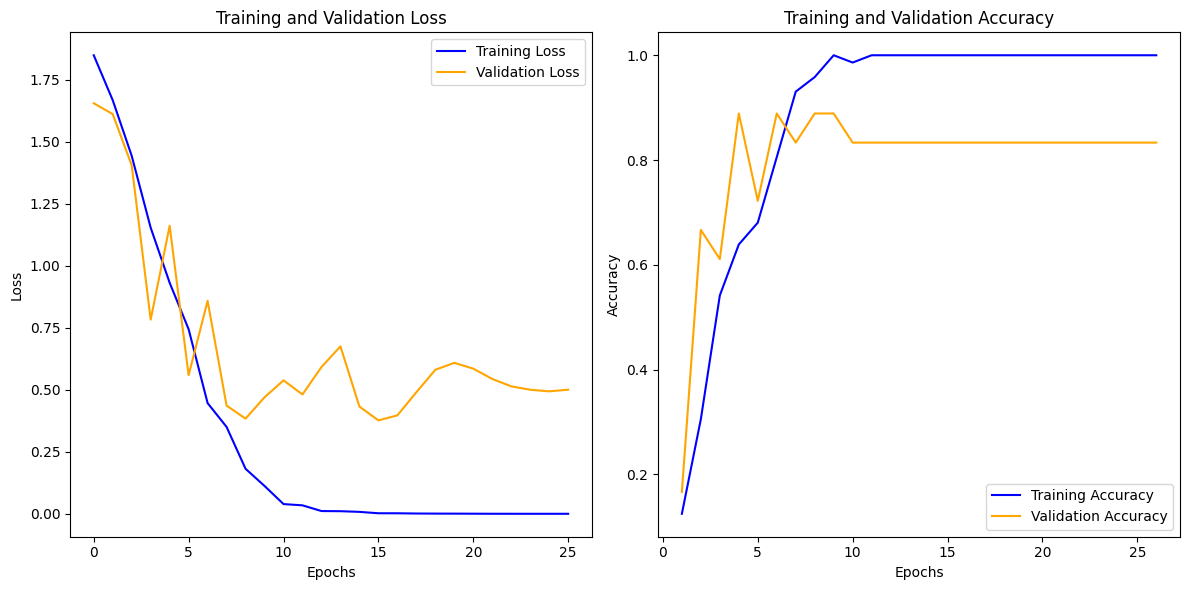

In [ ]:
train_loss = history.history ['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label="Training Accuracy", color="blue")
plt.plot(range(1, len(val_acc) + 1), val_acc, label="Validation Accuracy", color="orange")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Task 6 - Evaluate Model

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

test_ds = test_ds.map(lambda x, y: (rescale(x), y))

test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.7000 - loss: 1.3423
Test Loss: 1.3423222303390503
Test Accuracy: 0.699999988079071


# Task 7 - Save and Load Model

In [ ]:
model.save('classifier_model.h5')
load_model = tf.keras.models.load_model('classifier_model.h5')
load_model.evaluate(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.7000 - loss: 1.3423


[1.3423221111297607, 0.699999988079071]

# Task 8 - Predictions and Classification Report

In [ ]:
prediction = load_model.predict(test_ds)
predicted_labels = np.argmax(prediction, axis=1)

true_labels = np.concatenate([y for x, y in test_ds], axis=0)

print(classification_report(
    true_labels,
    predicted_labels,
    target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00         5
     cupuacu       0.00      0.00      0.00         5
    graviola       0.00      0.00      0.00         5
     guarana       0.00      0.00      0.00         5
     pupunha       0.40      0.40      0.40         5
      tucuma       0.00      0.00      0.00         5

    accuracy                           0.07        30
   macro avg       0.07      0.07      0.07        30
weighted avg       0.07      0.07      0.07        30

